##### Set Working Directory

In [1]:
import os
os.getcwd()

'd:\\Python_MachineLearning_Proj\\Classification'

In [2]:
os.chdir(r"C:\Users\thars\Downloads")

In [3]:
os.getcwd()

'C:\\Users\\thars\\Downloads'

##### import necessary libraries

In [4]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")

In [5]:
data = pd.read_csv(r"https://raw.githubusercontent.com/amankharwal/Website-data/master/onlinefoods.csv")
print(data.head())

   Age  Gender Marital Status Occupation  Monthly Income  \
0   20  Female         Single    Student       No Income   
1   24  Female         Single    Student  Below Rs.10000   
2   22    Male         Single    Student  Below Rs.10000   
3   22  Female         Single    Student       No Income   
4   22    Male         Single    Student  Below Rs.10000   

  Educational Qualifications  Family size  latitude  longitude  Pin code  \
0              Post Graduate            4   12.9766    77.5993    560001   
1                   Graduate            3   12.9770    77.5773    560009   
2              Post Graduate            3   12.9551    77.6593    560017   
3                   Graduate            6   12.9473    77.5616    560019   
4              Post Graduate            4   12.9850    77.5533    560010   

  Output   Feedback Unnamed: 12  
0    Yes   Positive         Yes  
1    Yes   Positive         Yes  
2    Yes  Negative          Yes  
3    Yes   Positive         Yes  
4    Yes   P

In [6]:
# let's see information about all the columns
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         388 non-null    int64  
 1   Gender                      388 non-null    object 
 2   Marital Status              388 non-null    object 
 3   Occupation                  388 non-null    object 
 4   Monthly Income              388 non-null    object 
 5   Educational Qualifications  388 non-null    object 
 6   Family size                 388 non-null    int64  
 7   latitude                    388 non-null    float64
 8   longitude                   388 non-null    float64
 9   Pin code                    388 non-null    int64  
 10  Output                      388 non-null    object 
 11  Feedback                    388 non-null    object 
 12  Unnamed: 12                 388 non-null    object 
dtypes: float64(2), int64(3), object(8)


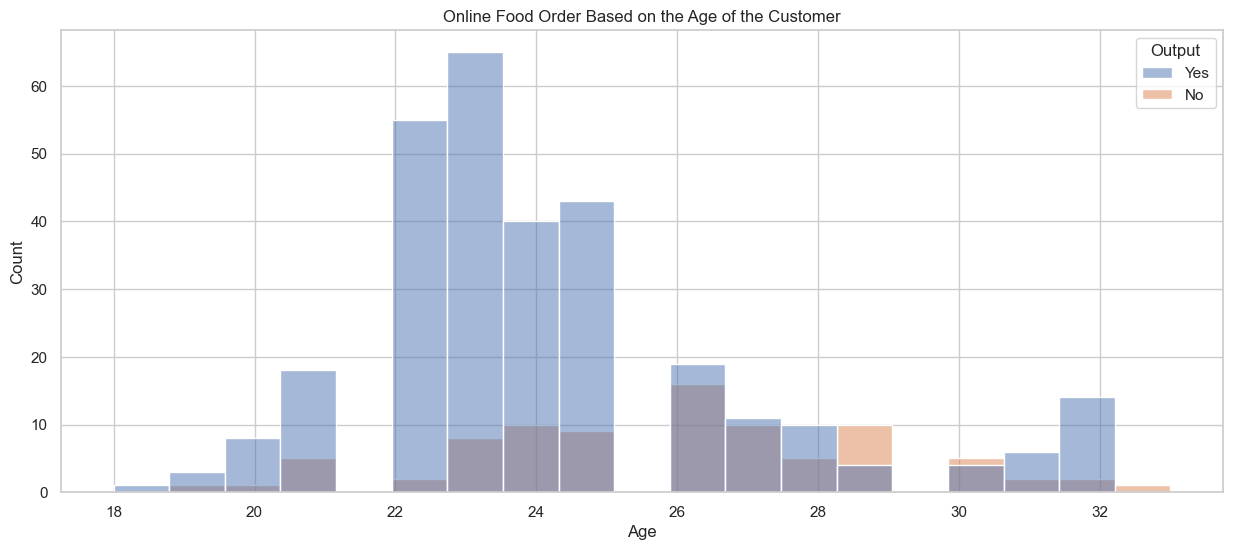

In [14]:
# Let's see the online food order decisions based on the age of the customer
plt.figure(figsize=(15, 6))
plt.title("Online Food Order Based on the Age of the Customer")
sns.histplot(x="Age", hue="Output", data=data)
plt.show()

<Axes: title={'center': 'Online Food Order Based on the Size of the Family'}, xlabel='Family size', ylabel='Count'>

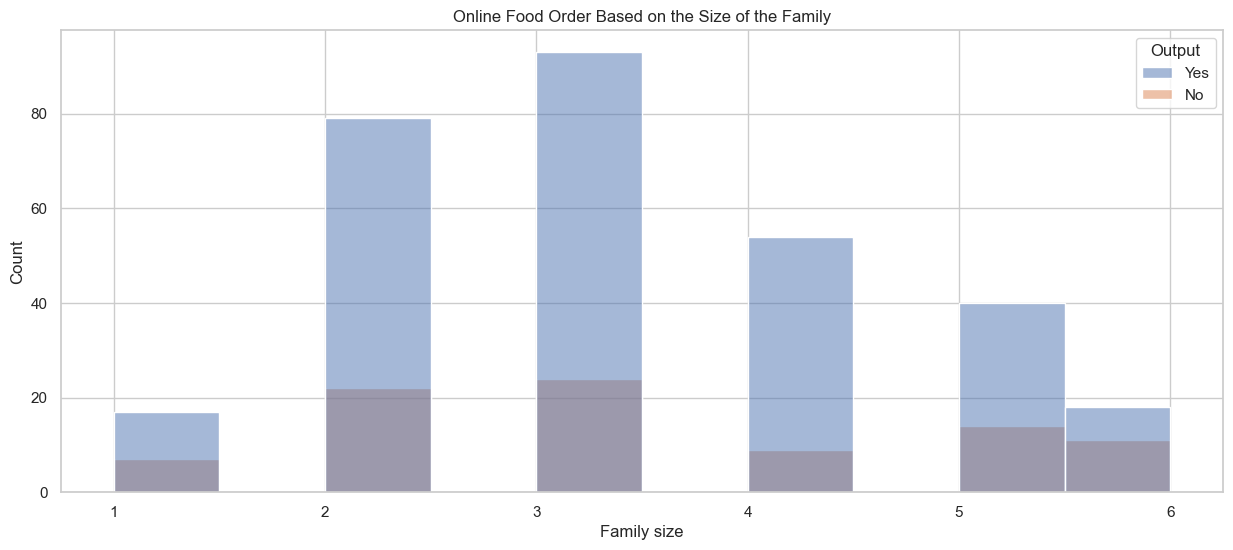

In [22]:
# Let's see the online food order decisions based on the size of the family
plt.figure(figsize=(15, 6))
plt.title("Online Food Order Based on the Size of the Family")
sns.histplot(x="Family size", hue="Output", data=data)

##### Let's Create the Dataset of the Customers who Ordered the Food Again

In [25]:
buying_again_data = data.query("Output=='Yes'")
print(buying_again_data.head())

   Age  Gender Marital Status Occupation  Monthly Income  \
0   20  Female         Single    Student       No Income   
1   24  Female         Single    Student  Below Rs.10000   
2   22    Male         Single    Student  Below Rs.10000   
3   22  Female         Single    Student       No Income   
4   22    Male         Single    Student  Below Rs.10000   

  Educational Qualifications  Family size  latitude  longitude  Pin code  \
0              Post Graduate            4   12.9766    77.5993    560001   
1                   Graduate            3   12.9770    77.5773    560009   
2              Post Graduate            3   12.9551    77.6593    560017   
3                   Graduate            6   12.9473    77.5616    560019   
4              Post Graduate            4   12.9850    77.5533    560010   

  Output   Feedback Unnamed: 12  
0    Yes   Positive         Yes  
1    Yes   Positive         Yes  
2    Yes  Negative          Yes  
3    Yes   Positive         Yes  
4    Yes   P

In [26]:
buying_again_data.shape

(301, 13)

In [53]:
# Now let's have a look at the Gender column, Let's find who order food more online
gender = buying_again_data["Gender"].value_counts()
label = gender.index
counts = gender.values
colors = ['gold','lightgreen']

fig = go.Figure(data=[go.Pie(labels=label, values=counts)])
fig.update_layout(title_text="Who Orders Food online More: Male vs. Female")
fig.update_traces(hoverinfo="label+percent", textinfo="value", textfont_size=30,
                  marker=dict(colors=colors, line=dict(color="black", width=3)))
fig.show()

In [52]:
# Now let's have a look at the marital status of the customers who ordered again
marital = buying_again_data["Marital Status"].value_counts()
label = marital.index
counts = marital.values
colors = ["gold", "lightgreen"]

fig = go.Figure(data=[go.Pie(labels=label, values=counts)])
fig.update_layout(title_text="Whoe Ordered Food More Online: Married vs. Single")
fig.update_traces(hoverinfo="label+percent", textinfo="value", textfont_size=30,
                  marker=dict(colors=colors, line=dict(color="black", width=3)))
fig.show()

In [61]:
# Now let's have a look at what's the income group of the customers who have ordered the food again
income = buying_again_data["Monthly Income"].value_counts()
label = income.index
counts = income.values
colors = ["gold", "lightgreen"]

fig = go.Figure(data=[go.Pie(labels=label, values=counts)])
fig.update_layout(title_text="Which income Group Order Food Online More")
fig.update_traces(hoverinfo="label+percent", textinfo="value", textfont_size=30,
                  marker=dict(colors=colors, line=dict(color="black", width=3)))

In [62]:
# Now let's prepare the data for the task of training a machine learning model. Here i will convert the
# all the Categorical features into numerical values:
data["Gender"] = data["Gender"].map({"Male":1,
                                     "Female":0})

data["Marital Status"] = data["Marital Status"].map({"Married":2,
                                                     "Single":1,
                                                     "Prefer not to say":0})

data["Occupation"] = data["Occupation"].map({"Student":1,
                                             "Employee":2,
                                             "Self Employeed":3,
                                             "House Wife":4})

data["Educational Qualifications"] = data["Educational Qualifications"].map({"Graduate":1,
                                                                             "Post Graduate":2,
                                                                             "Ph.D":3, "School":4,
                                                                             "Uneducated":5})

data["Monthly Income"] = data["Monthly Income"].map({"No Income": 0,
                                                     "25000 to 5000": 50000,
                                                     "more than 50000": 70000,
                                                     "10001 to 25000": 25000,
                                                     "Below RS.10000": 10000})

data["Feedback"] = data["Feedback"].map({"Positive":1, "Negative":0})

In [63]:
print(data.head())

   Age  Gender  Marital Status  Occupation  Monthly Income  \
0   20       0               1         1.0             0.0   
1   24       0               1         1.0             NaN   
2   22       1               1         1.0             NaN   
3   22       0               1         1.0             0.0   
4   22       1               1         1.0             NaN   

   Educational Qualifications  Family size  latitude  longitude  Pin code  \
0                           2            4   12.9766    77.5993    560001   
1                           1            3   12.9770    77.5773    560009   
2                           2            3   12.9551    77.6593    560017   
3                           1            6   12.9473    77.5616    560019   
4                           2            4   12.9850    77.5533    560010   

  Output  Feedback Unnamed: 12  
0    Yes       1.0         Yes  
1    Yes       1.0         Yes  
2    Yes       NaN         Yes  
3    Yes       1.0         Yes  

##### Online Food Order Prediction Model

In [69]:
# Now let's train a machine learning model to predict whether a customer will order again or not
# I will split the data into training and testing sets
# Splitting data
from sklearn.model_selection import train_test_split
x = np.array(data[["Age", "Gender", "Marital Status", "Occupation", 
                   "Monthly Income", "Educational Qualifications", 
                   "Family size", "Pin code", "Feedback"]])
y = np.array(data["Output"])

##### # Now let's train the machine learning model:

In [70]:
# training a machine learning model
from sklearn.ensemble import RandomForestClassifier
xtrain, xtest, ytrain, ytest = train_test_split(x, y, 
                                                test_size=0.10, 
                                                random_state=42)
model = RandomForestClassifier()
model.fit(xtrain, ytrain)
print(model.score(xtest, ytest))

0.9230769230769231


In [72]:
print("Enter Customers Details to Predict if the Customer will Order Again")
a = int(input("Enter the Age of the Customer: "))
b = int(input("Enter the Gender of the Customer (1 = Male, 0 = Female): "))
c = int(input("Enter Marital Status of the Customer (1 = Single, 2 = Married, 3 = Not Revealed): "))
d = int(input("Occupation of the Customer (1 = Student, 2 = Employee, 3 = Self Employeed, 4 = House Wife): "))
e = int(input("Monthly income of the Customer: "))
f = int(input("Educational Qualification (Graduate = 1, Post Graduate = 2, Ph.D = 3, School = 4, Uneducated = 5): "))
g = int(input("Family Size: "))
h = int(input("Pin Code: "))
i = int(input("Review of the Last Order (1 = Positive, 2 = Negative): "))

features = np.array([[a, b, c, d, e, f, g, h, i]])
print("Finding if the Customer Will Order Again: ", model.predict(features))

Enter Customers Details to Predict if the Customer will Order Again
Finding if the Customer Will Order Again:  ['Yes']
